# Class 4: Subplots and Combining Visualizations + Accessible Data Visualization
**Data Visualization - DSI Certificate**

Covers slides 06 (subplots) and 07 (accessibility)

## Subplots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# sample data
np.random.seed(613)
x1 = np.arange(50)
y1 = np.random.randint(0, 75, 50)
x2 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y2 = np.array([110, 180, 240, 99, 220])

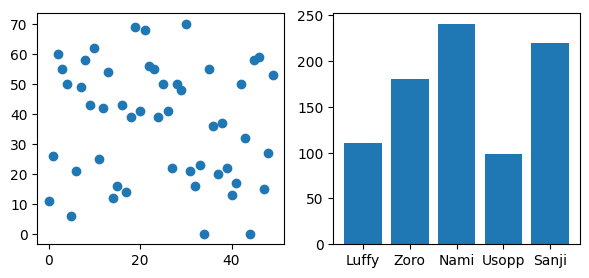

In [2]:
# basic side-by-side subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(7, 3))
ax1.scatter(x1, y1)
ax2.bar(x2, y2)
plt.show()

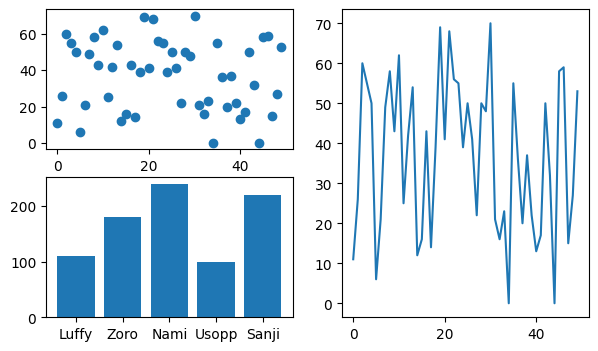

In [3]:
# using subplot_mosaic for non-grid layouts
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
                                    ['ax2', 'ax3']],
                                   figsize=(7, 4))
someaxes["ax1"].scatter(x1, y1)
someaxes["ax2"].bar(x2, y2)
someaxes["ax3"].plot(x1, y1)
plt.show()

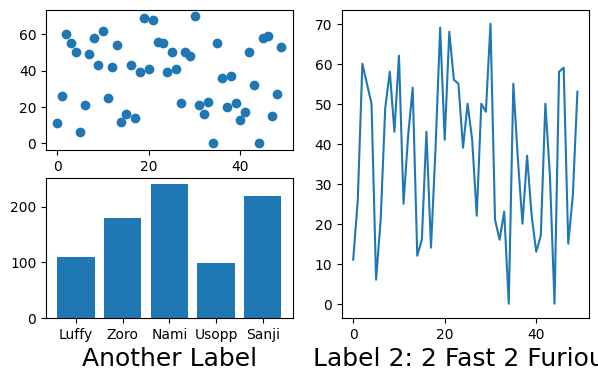

In [4]:
# adding big labels to see layout issues
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
                                    ['ax2', 'ax3']],
                                   figsize=(7, 4))
someaxes["ax1"].scatter(x1, y1)
someaxes["ax2"].bar(x2, y2)
someaxes["ax3"].plot(x1, y1)
someaxes["ax1"].set_xlabel('A Big Label', fontsize=18)
someaxes["ax2"].set_xlabel('Another Label', fontsize=18)
someaxes["ax3"].set_xlabel('Label 2: 2 Fast 2 Furious', fontsize=18)
plt.show()
# labels get cut off without a layout engine

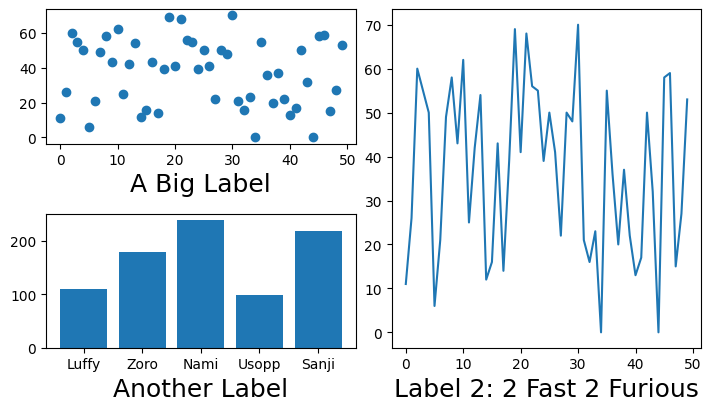

In [5]:
# fix it with constrained layout
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
                                    ['ax2', 'ax3']],
                                   figsize=(7, 4),
                                   layout="constrained")
someaxes["ax1"].scatter(x1, y1)
someaxes["ax2"].bar(x2, y2)
someaxes["ax3"].plot(x1, y1)
someaxes["ax1"].set_xlabel('A Big Label', fontsize=18)
someaxes["ax2"].set_xlabel('Another Label', fontsize=18)
someaxes["ax3"].set_xlabel('Label 2: 2 Fast 2 Furious', fontsize=18)
plt.show()

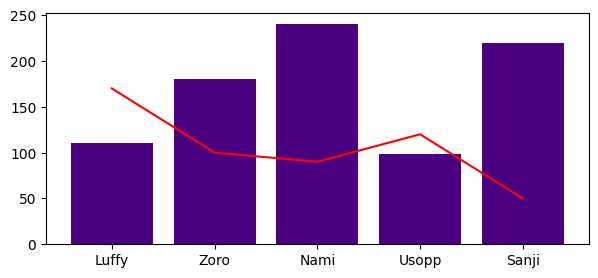

In [6]:
# multiple viz on one axes
x = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1_crew = np.array([110, 180, 240, 99, 220])
y2_crew = np.array([170, 100, 90, 120, 50])

fig, ax = plt.subplots(figsize=(7, 3))
ax.bar(x, y1_crew, color="indigo")
ax.plot(x, y2_crew, color="red")
plt.show()

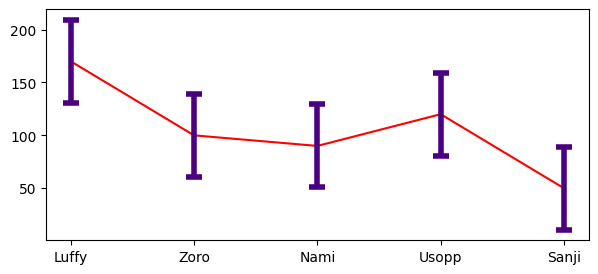

In [7]:
# adding error bars
y2_sd = np.std(y2_crew)

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2_crew, color="red")
ax.errorbar(x, y2_crew, yerr=y2_sd, fmt="none",
            ecolor="indigo", elinewidth=4, capsize=6, capthick=4)
plt.show()

Could not load image from URL: 403 Client Error: Forbidden for url: https://upload.wikimedia.org/wikipedia/en/c/cb/Monkey_D_Luffy.png
Showing plot without embedded image instead.


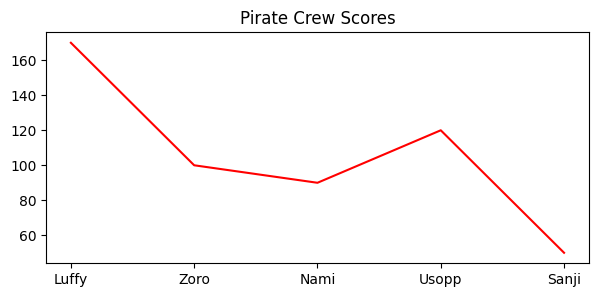

In [8]:
# adding an image from the internet to a plot
# (showing the technique - the actual URL may not always be accessible)
from PIL import Image
import requests
from io import BytesIO

try:
    response = requests.get('https://upload.wikimedia.org/wikipedia/en/c/cb/Monkey_D_Luffy.png', timeout=5)
    response.raise_for_status()
    image_file = BytesIO(response.content)
    image = Image.open(image_file)
    
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.plot(x, y2_crew, color="red")
    ax_image = fig.add_axes([0.1, 0.11, 0.15, 0.35])
    ax_image.imshow(image)
    ax_image.axis('off')
    plt.show()
except Exception as e:
    print(f"Could not load image from URL: {e}")
    print("Showing plot without embedded image instead.")
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.plot(x, y2_crew, color="red")
    ax.set_title("Pirate Crew Scores")
    plt.show()

### Saving a figure
```python
path = 'C:/Users/...'
filename = '/fig1a.png'
plt.savefig(path + filename, dpi=300)
```

## Accessibility Notes

We looked at the "Daily Routines of Famous Creative People" viz. It looks like a solid visualization at first glance, but Sarah Fossheim showed what it looks like with deuteranopia and achromatopsia -- the colours become indistinguishable and there are no labels to fall back on. So it fails for people with colourblindness.

The "flatten the curve" COVID viz was another example. It communicated a clear message to most people, but screen reader users and people with visual impairments were largely left out. From Lundgard & Satyanarayan (2022): "inaccessible visualizations are, at best, demeaning and, at worst, damaging to health."

### Practical takeaways for accessible design:

**Colour:**
- Think in terms of luminance, saturation, and hue as separate channels
- Small marks need more saturation to be distinguishable
- Use the Colour Blindness Simulator (color-blindness.com) to check your palettes
- Avoid overly bright colours (can be painful, especially for people on the autism spectrum)
- Use the WebAIM contrast checker to test colour pairs against WCAG standards
- Viridis colormaps are designed to work for colourblind viewers and in grayscale
- Do not rely on colour alone -- add patterns or textures where possible

**Text:**
- Sans-serif fonts are generally more accessible (Helvetica, Arial, Verdana, Courier)
- At least 12pt font size
- Monospaced text is more accessible than proportionally spaced
- Every visual element should be described in a legend

**Alt-text:**
- Should convey all essential information from the image
- Depends on purpose: decorative, focus on individuals, or focus on content
- For data visualizations, Lundgard & Satyanarayan propose four levels:
    - Level 1: chart type, title, axes, labels, colours
    - Level 2: descriptive stats, outliers, comparisons
    - Level 3: complex trends, clusters, perceptual interpretations
    - Level 4: context, domain insights, subjective interpretations
- Blind participants preferred levels 2 and 3 combined -- facts about the data, not someone else's editorialized interpretation

**Other considerations:**
- Cross-browser functionality if it is web-based
- Cost of access (open access, Creative Commons licenses)
- When in doubt, show it to someone and get feedback